In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical

In [2]:
import tensorflow.keras.backend as K
import os
import cv2
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

In [5]:
dirtrain = 'C:\\Users\\ARNAV\\Desktop\\Grapes Leaves Dataset (images)-20241115T093312Z-001\\Grapes Leaves Dataset (images)\\train'
dirtest = 'C:\\Users\\ARNAV\\Desktop\\Grapes Leaves Dataset (images)-20241115T093312Z-001\\Grapes Leaves Dataset (images)\\test'

In [6]:
categories=["Black_rot","Esca_(Black_Measles)","Healthy","Leaf_blight_(Isariopsis_Leaf_Spot)"]

(256, 256, 3)


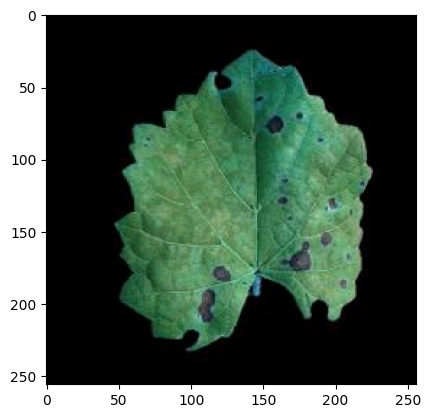

In [7]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [8]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                img_array=cv2.resize(img_array,(256,256,3))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()

In [9]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                img_array=cv2.resize(img_array,(256,256,3))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()

In [10]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

0
[966, 1154, 213, 876]
0
[210, 240, 220, 210]


In [11]:
random.shuffle(training_data)
random.shuffle(testing_data)

for s in training_data:
    print(s[1])

In [12]:
x_train = []
y_train = []
x_test = []
y_test = []

In [13]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
'''for features,label in testing_data:
    x_train.append(features)
    y_train.append(label)'''
x_train=np.array(x_train).reshape(-1,256,256,3)
sh=x_train.shape
print(sh)

(0, 256, 256, 3)


In [14]:
x=cv2.resize(training_data[0][0],(256,256,3))
plt.imshow(x,cmap='gray')

IndexError: list index out of range

In [15]:
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,256,256,3)

In [16]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [17]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)

In [18]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train

In [19]:
x_train.shape

(0, 256, 256, 3)

In [20]:
from tensorflow.keras.optimizers import Adam
K.clear_session()
model=Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))



model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


c:\Users\ARNAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,556 (873.27 KB)

 Trainable params: 223,556 (873.27 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
y_train_cat=to_categorical(y_train,4)

In [23]:
y_test_cat=to_categorical(y_test,4)

In [24]:
history=model.fit(x_train,y_train_cat,batch_size=32,
          epochs=20,verbose=1,validation_split=0.30,shuffle=True)

ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.3`. Either provide more data, or a different value for the `validation_split` argument.

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions for the test data
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

In [ ]:
model.save("leaf_disease_coloured3.h5")

In [ ]:
new_model=tf.keras.models.load_model("leaf_disease_coloured.h5")

In [ ]:
loss, acc = new_model.evaluate(x_test,y_test_cat, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

In [ ]:
'''from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())'''

In [ ]:
# Predicting a single image
d = 'C:\\Users\\ARNAV\\Desktop\\grape img\\lb.jpg'
img = cv2.imread(d)
img = cv2.resize(img, (256, 256))  # Resize to match model input
img = img.reshape(-1, 256, 256, 3) # Reshape for prediction

img_rgb = cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis labels
plt.show()


In [ ]:
predictions = new_model.predict(img)
predict_class = np.argmax(predictions, axis=1)
print(categories[predict_class[0]])
